In [2]:
# creating a dummy dataset for the purpose of this tutorial
# marks_vs_rank.csv
%pip install pandas
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(0)

# Generate a sample of marks
num_samples = 100
mean_marks = 75
std_deviation_marks = 10
marks = np.random.normal(mean_marks, std_deviation_marks, num_samples)

# Generate a corresponding set of ranks
# You can create a linear relationship between marks and ranks
# For simplicity, we'll use a linear equation: rank = a * marks + b + noise
a = 0.5  # Slope of the line
b = 10   # Intercept
noise = np.random.normal(0, 5, num_samples)  # Adding some random noise to the relationship
ranks = a * marks + b + noise

# Create a DataFrame to store the data
data = pd.DataFrame({'Marks': marks, 'Rank': ranks})

# Display the first few rows of the dataset
print(data.head())

# Save the dataset to a CSV file
data.to_csv('marks_vs_rank.csv', index=False)


  Using cached pandas-2.0.3-cp311-cp311-win_amd64.whl (10.6 MB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


       Marks       Rank
0  92.640523  65.736015
1  79.001572  42.761991
2  84.787380  46.041265
3  97.408932  63.551450
4  93.675580  50.972173


In [3]:
%pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('marks_vs_rank.csv')

# Separate the features (marks) and target variable (rank)
X = data['Marks'].values.reshape(-1, 1)
y = data['Rank']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Support Vector Regression': SVR(kernel='linear')
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append([model_name, mae, mse, r2])

# Display the results
results_df = pd.DataFrame(results, columns=['Model', 'Mean Absolute Error', 'Mean Squared Error', 'R-squared'])
print(results_df)


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


                       Model  Mean Absolute Error  Mean Squared Error  \
0          Linear Regression             5.054261           34.998203   
1   Decision Tree Regression             5.534801           45.372294   
2   Random Forest Regression             4.499778           30.093511   
3  Support Vector Regression             4.834901           32.801545   

   R-squared  
0   0.561281  
1   0.431237  
2   0.622764  
3   0.588818  


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[34.82239753 37.24622239 50.53768627 48.42251274 43.43838433 44.52592824
 47.1703688  37.24622239 51.99770681 57.40713778 46.43252185 49.71606669
 37.36647419 38.68601967 48.67753937 53.33244841 45.3524886  39.99487412
 53.05272391 54.60014898]



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached matplotlib-3.7.2-cp311-cp311-win_amd64.whl (7.5 MB)
  Using cached contourpy-1.1.0-cp311-cp311-win_amd64.whl (470 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
     -                                        0.1/2.1 MB 1.2 MB/s eta 0:00:02
     --                                       0.1/2.1 MB 1.0 MB/s eta 0:00:02
     ----                                     0.2/2.1 MB 1.5 MB/s eta 0:00:02
     ------                                   0.4/2.1 MB 1.6 MB/s eta 0:00:02
     -------                                  0.4/2.1 MB 1.6 MB/s eta 0:00:02
     ----------                               0.6/2.1 MB 1.9 MB/s eta 0:00:01
     -----------------                        0.9/2.1 MB 2.5 MB/s eta 0:00:01
     -------------------                      1.0/2.1 MB 2.6 MB/s eta 0:00:01
     -----------------------------------      

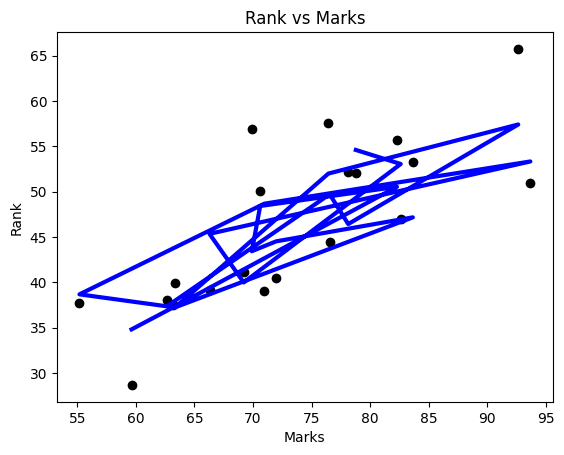

In [4]:
%pip install joblib
import joblib

# Save the best model as a pickle file
best_model = RandomForestRegressor(n_estimators=100)
best_model.fit(X_train, y_train)
joblib.dump(best_model, 'best_model.pkl')

# Load the pickle file
loaded_model = joblib.load('best_model.pkl')

# Make predictions on the test data
y_pred = loaded_model.predict(X_test)

# Display the predictions
print(y_pred)

# Save the predictions to a CSV file
output = pd.DataFrame({'Marks': X_test.reshape(1, -1)[0], 'Predicted Rank': y_pred})
output.to_csv('predictions.csv', index=False)

# Plot the predictions
%pip install matplotlib
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Marks')
plt.ylabel('Rank')
plt.title('Rank vs Marks')
plt.show()

